In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_vistazo = pd.read_excel('CDMX.xlsx')
data_vistazo

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,property_type,room_type,capacity,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,within a day,1.0,NaN,f,f,Entire loft,Entire home/apt,3,1434,1,1125,4.95,4.71,4.95,5.00,4.95,5.00,4.86,f,0.19
1,NaN,NaN,NaN,f,t,Entire guest suite,Entire home/apt,2,830,3,1125,4.85,4.90,4.88,4.93,5.00,4.95,4.84,f,0.54
2,within an hour,1.0,0.90,t,t,Entire rental unit,Entire home/apt,6,1469,24,1125,4.57,4.82,4.71,4.92,4.92,4.58,4.71,f,0.31
3,NaN,NaN,NaN,f,t,Entire villa,Entire home/apt,2,3658,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
4,within an hour,1.0,0.86,f,t,Entire home,Entire home/apt,14,18000,1,365,4.58,4.56,4.70,4.87,4.78,4.98,4.48,f,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,within an hour,1.0,1.00,f,t,Entire rental unit,Entire home/apt,2,760,3,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
24220,NaN,NaN,NaN,f,t,Entire rental unit,Entire home/apt,7,1520,1,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
24221,NaN,NaN,0.96,f,t,Private room in home,Private room,2,533,5,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
24222,within an hour,1.0,1.00,t,t,Entire rental unit,Entire home/apt,2,1200,1,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN


In [3]:
# Vemos el fomato de las variables
data_vistazo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           21133 non-null  object 
 1   host_response_rate           21133 non-null  float64
 2   host_acceptance_rate         22181 non-null  float64
 3   host_is_superhost            24219 non-null  object 
 4   host_identity_verified       24224 non-null  object 
 5   property_type                24224 non-null  object 
 6   room_type                    24224 non-null  object 
 7   capacity                     24224 non-null  int64  
 8   price                        24224 non-null  int64  
 9   minimum_nights               24224 non-null  int64  
 10  maximum_nights               24224 non-null  int64  
 11  review_scores_rating         20628 non-null  float64
 12  review_scores_accuracy       20572 non-null  float64
 13  review_scores_cl

In [4]:
# Elegimos solo los datos cualitativos y los separamos de los datos cuantitativos.
datos_cuali = data_vistazo.select_dtypes(include=['object'])
datos_cuali

,host_response_time,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable
0,within a day,f,f,Entire loft,Entire home/apt,f
1,NaN,f,t,Entire guest suite,Entire home/apt,f
2,within an hour,t,t,Entire rental unit,Entire home/apt,f
3,NaN,f,t,Entire villa,Entire home/apt,f
4,within an hour,f,t,Entire home,Entire home/apt,f
...,...,...,...,...,...,...
24219,within an hour,f,t,Entire rental unit,Entire home/apt,f
24220,NaN,f,t,Entire rental unit,Entire home/apt,t
24221,NaN,f,t,Private room in home,Private room,f
24222,within an hour,t,t,Entire rental unit,Entire home/apt,t


In [6]:
# Separamos los datos cuantitativos también
datos_cuanti = data_vistazo.select_dtypes(np.number)
datos_cuanti

,host_response_rate,host_acceptance_rate,capacity,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,NaN,3,1434,1,1125,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,NaN,NaN,2,830,3,1125,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,1.0,0.90,6,1469,24,1125,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,NaN,NaN,2,3658,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.86,14,18000,1,365,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,1.0,1.00,2,760,3,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,NaN,NaN,7,1520,1,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,NaN,0.96,2,533,5,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,1.0,1.00,2,1200,1,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Copiamos las bases de datos para trabajar los nulos
datos_cuali2 = datos_cuali.copy()
datos_cuanti2 = datos_cuanti.copy()

In [13]:
#Identificar valores nulos por (cuantitativos)
valores_nulos = datos_cuali.isnull().sum()
valores_nulos

host_response_time        3091
host_is_superhost            5
host_identity_verified       0
property_type                0
room_type                    0
instant_bookable             0
dtype: int64

In [16]:
# Reemplazamos valores nulos cualitativos en el dataframe con "desconocido" puesto que no existe ningun patrón para encontrar los datos exactos

df_cuali_in =datos_cuali2.fillna("Desconocido") 
df_cuali_in

,host_response_time,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable
0,within a day,f,f,Entire loft,Entire home/apt,f
1,Desconocido,f,t,Entire guest suite,Entire home/apt,f
2,within an hour,t,t,Entire rental unit,Entire home/apt,f
3,Desconocido,f,t,Entire villa,Entire home/apt,f
4,within an hour,f,t,Entire home,Entire home/apt,f
...,...,...,...,...,...,...
24219,within an hour,f,t,Entire rental unit,Entire home/apt,f
24220,Desconocido,f,t,Entire rental unit,Entire home/apt,t
24221,Desconocido,f,t,Private room in home,Private room,f
24222,within an hour,t,t,Entire rental unit,Entire home/apt,t


In [17]:
# Limpieza de los datos cualitativos
valores_nulos2 = df_cuali_in.isnull().sum()
valores_nulos2

host_response_time        0
host_is_superhost         0
host_identity_verified    0
property_type             0
room_type                 0
instant_bookable          0
dtype: int64

In [18]:
#Identificar valores nulos por (cuantitativos)
valores_nulos3 = datos_cuanti.isnull().sum()
valores_nulos3

host_response_rate             3091
host_acceptance_rate           2043
capacity                          0
price                             0
minimum_nights                    0
maximum_nights                    0
review_scores_rating           3596
review_scores_accuracy         3652
review_scores_cleanliness      3651
review_scores_checkin          3652
review_scores_communication    3652
review_scores_location         3653
review_scores_value            3653
reviews_per_month              3596
dtype: int64

In [23]:
# Limpieza de datos cuantitativos

# Sustituir valores nulos con promedio 
# Estos valores están en porcentaje y por lo tanto se decide usar promedio para considerar todos los datos dentro de una escala contando ya con un parámetro definido 
datos_cuanti2["host_response_rate"]=datos_cuanti["host_response_rate"].fillna(round(datos_cuanti["host_response_rate"].mean(),1))
datos_cuanti2["host_acceptance_rate"]=datos_cuanti["host_acceptance_rate"].fillna(round(datos_cuanti["host_acceptance_rate"].mean(),1))
# Estos otros valores tienen parámetro del 1 al 5 por lo tanto también se puede usar la media
datos_cuanti2["review_scores_rating"]=datos_cuanti["review_scores_rating"].fillna(round(datos_cuanti["review_scores_rating"].mean(),1))
datos_cuanti2["review_scores_accuracy"]=datos_cuanti["review_scores_accuracy"].fillna(round(datos_cuanti["review_scores_accuracy"].mean(),1))
datos_cuanti2["review_scores_cleanliness"]=datos_cuanti["review_scores_cleanliness"].fillna(round(datos_cuanti["review_scores_cleanliness"].mean(),1))
datos_cuanti2["review_scores_checkin"]=datos_cuanti["review_scores_checkin"].fillna(round(datos_cuanti["review_scores_checkin"].mean(),1))
datos_cuanti2["review_scores_communication"]=datos_cuanti["review_scores_communication"].fillna(round(datos_cuanti["review_scores_communication"].mean(),1))
datos_cuanti2["review_scores_location"]=datos_cuanti["review_scores_location"].fillna(round(datos_cuanti["review_scores_location"].mean(),1))
datos_cuanti2["review_scores_value"]=datos_cuanti["review_scores_value"].fillna(round(datos_cuanti["review_scores_value"].mean(),1))
# Sustituir valores nulos con mediana
# Para esta cáptura de datos no hay parametro y el rellenado de nulos no se verá tan afectado como sí al usar media
datos_cuanti2["reviews_per_month"]=datos_cuanti["reviews_per_month"].fillna(round(datos_cuanti["reviews_per_month"].median(),1))

In [24]:
#Identificar valores nulos por (cuantitativos)
valores_nulos_3=datos_cuanti2.isnull().sum()
valores_nulos_3

host_response_rate             0
host_acceptance_rate           0
capacity                       0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

In [25]:
# Copiamos el data frame cuantitativo sin valores nulos

df_cuan = datos_cuanti2.copy()
df_cual = datos_cuali2.copy()

In [31]:
# Guardamos las medidas que sí tienen outliers en otro data frame

df_out = df_cuan[['minimum_nights', 'maximum_nights','reviews_per_month']]
df_out 

# Las dropeamos del data frame original

df_cuanti_out = df_cuan.drop(['minimum_nights','maximum_nights','reviews_per_month'], axis=1)
df_cuanti_out

,host_response_rate,host_acceptance_rate,capacity,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1.0,0.90,3,1434,4.95,4.71,4.95,5.00,4.95,5.00,4.86
1,0.9,0.90,2,830,4.85,4.90,4.88,4.93,5.00,4.95,4.84
2,1.0,0.90,6,1469,4.57,4.82,4.71,4.92,4.92,4.58,4.71
3,0.9,0.90,2,3658,4.70,4.80,4.70,4.80,4.80,4.80,4.70
4,1.0,0.86,14,18000,4.58,4.56,4.70,4.87,4.78,4.98,4.48
...,...,...,...,...,...,...,...,...,...,...,...
24219,1.0,1.00,2,760,4.70,4.80,4.70,4.80,4.80,4.80,4.70
24220,0.9,0.90,7,1520,4.70,4.80,4.70,4.80,4.80,4.80,4.70
24221,0.9,0.96,2,533,4.70,4.80,4.70,4.80,4.80,4.80,4.70
24222,1.0,1.00,2,1200,4.70,4.80,4.70,4.80,4.80,4.80,4.70


<Figure size 1500x800 with 0 Axes>

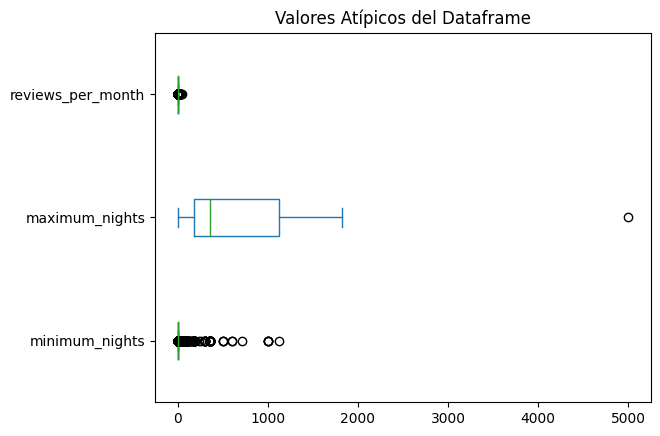

In [32]:
# Verificamos valores atípicos por plot (diagrama de caja o bigote) de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_out.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [33]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y= df_out

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido minimum_nights          3.50000
maximum_nights       2542.50000
reviews_per_month       4.48125
dtype: float64
Limite inferior permitido minimum_nights         -0.50000
maximum_nights      -1237.50000
reviews_per_month      -1.80875
dtype: float64


In [36]:
#Encontramos Outliers del Dataframe
outliers_iqr= df_out[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,minimum_nights,maximum_nights,reviews_per_month
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,24.0,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
24219,NaN,NaN,NaN
24220,NaN,NaN,NaN
24221,5.0,NaN,NaN
24222,NaN,NaN,NaN


In [37]:
#Obtenemos datos limpios del Dataframe
data3_iqr= df_out[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,minimum_nights,maximum_nights,reviews_per_month
0,1.0,1125.0,0.19
1,3.0,1125.0,0.54
2,NaN,1125.0,0.31
3,1.0,7.0,1.10
4,1.0,365.0,0.46
...,...,...,...
24219,3.0,365.0,1.10
24220,1.0,365.0,1.10
24221,NaN,365.0,1.10
24222,1.0,365.0,1.10


In [40]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

minimum_nights       3195
maximum_nights          1
reviews_per_month    1373
dtype: int64

In [41]:
#Reemplazamos valores atípicos (nulos) del dataframe con "median"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.median(),1))
data4_iqr

,minimum_nights,maximum_nights,reviews_per_month
0,1.0,1125.0,0.19
1,3.0,1125.0,0.54
2,1.0,1125.0,0.31
3,1.0,7.0,1.10
4,1.0,365.0,0.46
...,...,...,...
24219,3.0,365.0,1.10
24220,1.0,365.0,1.10
24221,1.0,365.0,1.10
24222,1.0,365.0,1.10


In [42]:
#Corroboramos valores nulos del dataframe LIMPIO sin outliers
valores_nulos_4 = data4_iqr.isnull().sum()
valores_nulos_4

minimum_nights       0
maximum_nights       0
reviews_per_month    0
dtype: int64

In [44]:
# Unimos las columnas cualitativas y las que dado su naturaleza no poseían outliers con el dataframe

Datos_sin_outliers = pd.concat([df_cuali_in, df_cuanti_out], axis=1)
Datos_sin_outliers

,host_response_time,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,host_response_rate,host_acceptance_rate,capacity,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,within a day,f,f,Entire loft,Entire home/apt,f,1.0,0.90,3,1434,4.95,4.71,4.95,5.00,4.95,5.00,4.86
1,Desconocido,f,t,Entire guest suite,Entire home/apt,f,0.9,0.90,2,830,4.85,4.90,4.88,4.93,5.00,4.95,4.84
2,within an hour,t,t,Entire rental unit,Entire home/apt,f,1.0,0.90,6,1469,4.57,4.82,4.71,4.92,4.92,4.58,4.71
3,Desconocido,f,t,Entire villa,Entire home/apt,f,0.9,0.90,2,3658,4.70,4.80,4.70,4.80,4.80,4.80,4.70
4,within an hour,f,t,Entire home,Entire home/apt,f,1.0,0.86,14,18000,4.58,4.56,4.70,4.87,4.78,4.98,4.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,within an hour,f,t,Entire rental unit,Entire home/apt,f,1.0,1.00,2,760,4.70,4.80,4.70,4.80,4.80,4.80,4.70
24220,Desconocido,f,t,Entire rental unit,Entire home/apt,t,0.9,0.90,7,1520,4.70,4.80,4.70,4.80,4.80,4.80,4.70
24221,Desconocido,f,t,Private room in home,Private room,f,0.9,0.96,2,533,4.70,4.80,4.70,4.80,4.80,4.80,4.70
24222,within an hour,t,t,Entire rental unit,Entire home/apt,t,1.0,1.00,2,1200,4.70,4.80,4.70,4.80,4.80,4.80,4.70


In [45]:
# Hacemos una ultima unión de nuestro data frame juntando ahora con las que sí fueron procesadas para Outliers
Datos_limpios = pd.concat([Datos_sin_outliers, data4_iqr], axis=1)
Datos_limpios

,host_response_time,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,host_response_rate,host_acceptance_rate,capacity,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_nights,maximum_nights,reviews_per_month
0,within a day,f,f,Entire loft,Entire home/apt,f,1.0,0.90,3,1434,4.95,4.71,4.95,5.00,4.95,5.00,4.86,1.0,1125.0,0.19
1,Desconocido,f,t,Entire guest suite,Entire home/apt,f,0.9,0.90,2,830,4.85,4.90,4.88,4.93,5.00,4.95,4.84,3.0,1125.0,0.54
2,within an hour,t,t,Entire rental unit,Entire home/apt,f,1.0,0.90,6,1469,4.57,4.82,4.71,4.92,4.92,4.58,4.71,1.0,1125.0,0.31
3,Desconocido,f,t,Entire villa,Entire home/apt,f,0.9,0.90,2,3658,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.0,7.0,1.10
4,within an hour,f,t,Entire home,Entire home/apt,f,1.0,0.86,14,18000,4.58,4.56,4.70,4.87,4.78,4.98,4.48,1.0,365.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,within an hour,f,t,Entire rental unit,Entire home/apt,f,1.0,1.00,2,760,4.70,4.80,4.70,4.80,4.80,4.80,4.70,3.0,365.0,1.10
24220,Desconocido,f,t,Entire rental unit,Entire home/apt,t,0.9,0.90,7,1520,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.0,365.0,1.10
24221,Desconocido,f,t,Private room in home,Private room,f,0.9,0.96,2,533,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.0,365.0,1.10
24222,within an hour,t,t,Entire rental unit,Entire home/apt,t,1.0,1.00,2,1200,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.0,365.0,1.10
